## <center>K mean clustering <center>

`Supervised learning problems`: when we have a target variable to predict based on a given set of predictors.

`Unsupervised learning problems`: without any fixed target variable

`Clustering` is the process of dividing the entire data into groups (also known as clusters) based on the patterns in the data

#### How does k-means clustering work?

1. Clusters the data into k groups where k  is predefined.
2. Select k points at random as cluster centers.
3. Assign objects to their closest cluster center according to the Euclidean distance function.
4. Calculate the centroid or mean of all objects in each cluster.
5. Repeat steps 2, 3 and 4 until some criteria is met (e.g. the sum of distances between the data points and their corresponding centroid is minimized, a maximum number of iterations is reached, no changes in centroids value or no data points change clusters).

#### Example (One iteration)

|Height|Weight|
|--|--|
|185|72|
|170|56|
|168|60|
|179|68|

##### Step 1: 

Let us assume that we have two cluster K<sub>1</sub> and K<sub>2</sub>

##### Step 2: 

Let cluster center for K<sub>1</sub> and K<sub>2</sub> are (185,72) and (170,56) respectively

##### Step 3: 

In [5]:
import math
import numpy as np
E_D = lambda x,y : np.round(math.sqrt(sum([(a - b) ** 2 for a, b in zip(x, y)])),2)

Euclidian distance for K<sub>1</sub>

In [6]:
E_D([168,60],[185,72])

20.81

Euclidian distance for K<sub>2</sub>

In [7]:
E_D([168,60],[170,56])

4.47

##### Step 4: 

Third row will go to K<sub>2</sub> centroid.So we need to calculate new K<sub>2</sub> centroid

K<sub>2</sub>=((170+168)/2,(60+56)/2)

In [8]:
[(170+168)/2,(60+56)/2]

[169.0, 58.0]

Euclidian distance for K<sub>1</sub>

In [9]:
E_D([179,68],[185,72])

7.21

Euclidian distance for K<sub>2</sub>

In [10]:
E_D([179,68],[169,58])

14.14

Fourth row will go to centroid 1. So, we need to calculate new centroid for K<sub>1</sub>

K<sub>1</sub>=((185+179)/2,(72+68)/2)

In [11]:
[(185+179)/2,(72+68)/2]

[182.0, 70.0]

So, our calculations shows K<sub>1</sub>(182.0, 70.0) and K<sub>2</sub>(169.0, 58.0) contains point {`(185,72)` and `(179,68)`} and {`(170,56)`,`(168,60)`} respectively.

## Practical

In [12]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plot_size = plt.rcParams["figure.figsize"] 
plot_size[0] = 20
plot_size[1] = 4
plt.rcParams["figure.figsize"] = plot_size
import pandas as pd

In [13]:
#Importing the mall dataset with pandas
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:,[3,4]].values

In [14]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [15]:
corr = dataset.iloc[:,3:].astype(int).corr(method ='pearson')
corr.style.background_gradient(cmap='coolwarm')

,Annual Income (k$),Spending Score (1-100)
Annual Income (k$),1.000000,0.009903
Spending Score (1-100),0.009903,1.000000


In [5]:
X.shape

(200, 2)

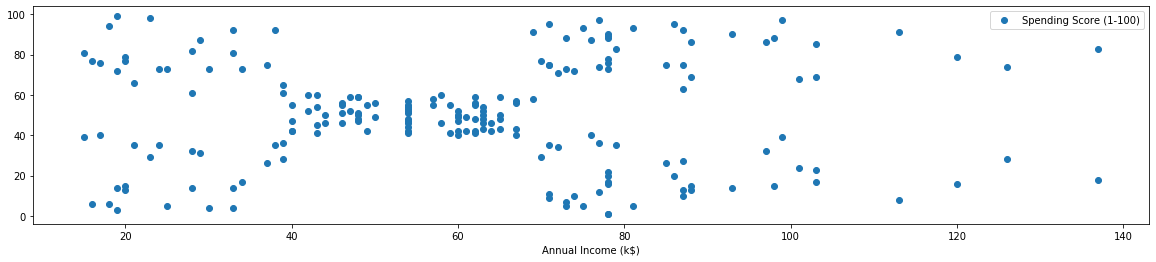

In [23]:
dataset.plot(x='Annual Income (k$)', y='Spending Score (1-100)', style='o')

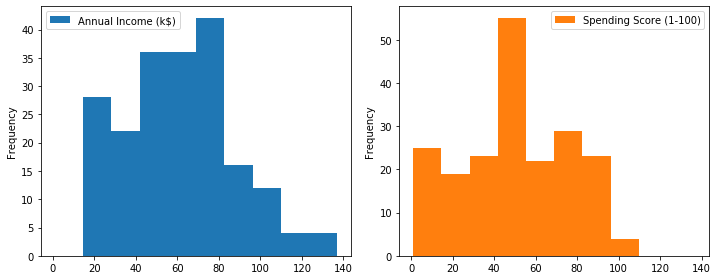

In [7]:
dataset.iloc[:,3:].plot(kind='hist', subplots=True, layout=(1,4), sharex=True)
plt.tight_layout()
plt.show()

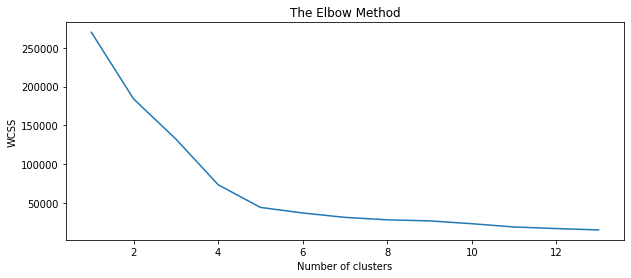

In [20]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
plot_size = plt.rcParams["figure.figsize"] 
plot_size[0] = 10
plot_size[1] = 4
wcss =[]
for i in range (1,14):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter =300, n_init = 1, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
# Plot the graph to visualize the Elbow Method to find the optimal number of cluster  
plt.plot(range(1,14),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

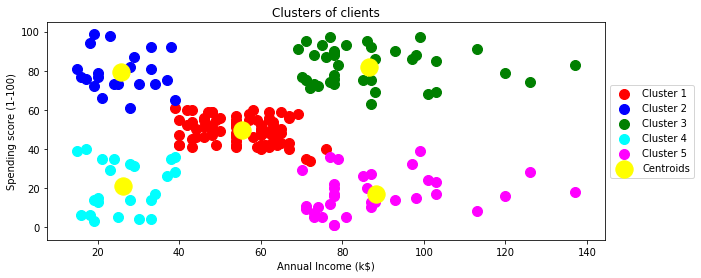

In [39]:
# Applying KMeans to the dataset with the optimal number of cluster

kmeans=KMeans(n_clusters= 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
Y_Kmeans = kmeans.fit_predict(X)

# Visualising the clusters

plt.scatter(X[Y_Kmeans == 0, 0], X[Y_Kmeans == 0,1],s = 100, c='red', label = 'Cluster 1')

plt.scatter(X[Y_Kmeans == 1, 0], X[Y_Kmeans == 1,1],s = 100, c='blue', label = 'Cluster 2')

plt.scatter(X[Y_Kmeans == 2, 0], X[Y_Kmeans == 2,1],s = 100, c='green', label = 'Cluster 3')

plt.scatter(X[Y_Kmeans == 3, 0], X[Y_Kmeans == 3,1],s = 100, c='cyan', label = 'Cluster 4')

plt.scatter(X[Y_Kmeans == 4, 0], X[Y_Kmeans == 4,1],s = 100, c='magenta', label = 'Cluster 5')


plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 300, c = 'yellow', label = 'Centroids')
    
plt.title('Clusters of clients')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending score (1-100)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [40]:
# Calculate silhouette_score
from sklearn.metrics import silhouette_score
print("Silhouette_score:",np.round(silhouette_score(X, kmeans.labels_),2))

Silhouette_score: 0.55


In [41]:
cluster_labels = kmeans.labels_
cluster_labels = pd.DataFrame(cluster_labels, columns=['ClusterLabel'])

In [42]:
pd.concat([dataset,cluster_labels],axis=1).head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),ClusterLabel
0,1,Male,19,15,39,3
1,2,Male,21,15,81,1
2,3,Female,20,16,6,3
3,4,Female,23,16,77,1
4,5,Female,31,17,40,3


In [45]:
kmeans.predict([[5,30]])

array([3])